In [87]:
# Import packages
import numpy as np
import pandas as pd
from numpy import mean

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.model_selection import KFold as kf
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import tree
import sklearn.metrics as metrics

In [100]:

df = pd.read_csv('../eda/final_combined_profile.csv')
#df['y'].mask(df['y'] == 0, 'real', inplace=True)
#f['y'].mask(df['y'] == 1, 'scammer', inplace=True)

df['age'].fillna(value=df['age'].mean(), inplace=True)

print(df['status'].value_counts())
df['age_grp'] = pd.qcut(df['age'], 4)


df['age_grp'] = df['age_grp'].astype(str)

X = df.drop(['age','username', 'occupation','filtered sentence','y','Language','status_lem'], axis=1)


# target
y = df['y']



for column in X:
    if X[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        X[column] = le.fit_transform(X[column])
        


print(X['status'].value_counts())

single                5038
divorced              1472
widowed               1022
separated              721
in relationship        110
married                 75
widower                  8
widow                    4
single or divorced       2
Name: status, dtype: int64
4    5038
0    1472
7    1022
3     721
1     110
2      75
8       8
6       4
5       2
Name: status, dtype: int64


In [89]:
df['age_grp'].value_counts()

(17.999, 33.0]    2323
(33.0, 42.0]      2082
(42.0, 51.0]      2072
(51.0, 85.0]      1975
Name: age_grp, dtype: int64

Precision: 0.7702702702702703
Recall: 0.6010544815465729
F1_score: 0.6752221125370188
Accuracy: 0.8054405677114134


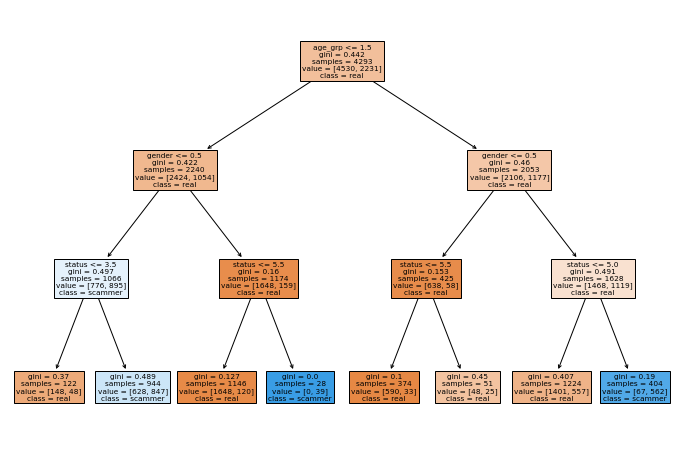

In [90]:

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=424
)

rf = RandomForestClassifier(n_estimators=100, 
                            max_depth=3,
                            max_features='auto', 
                    
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=42)

rf.fit(X_train, y_train)

tree.plot_tree(rf.estimators_[3], feature_names=X_test.columns,class_names=['real', "scammer"],filled=True)

y_pred = rf.predict(X_test)

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
print("Precision:",precision)
print("Recall:",recall)
print("F1_score:",f1_score)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))




In [84]:


rf = RandomForestClassifier(random_state=424, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=424),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [85]:
grid_search.best_score_
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=424)

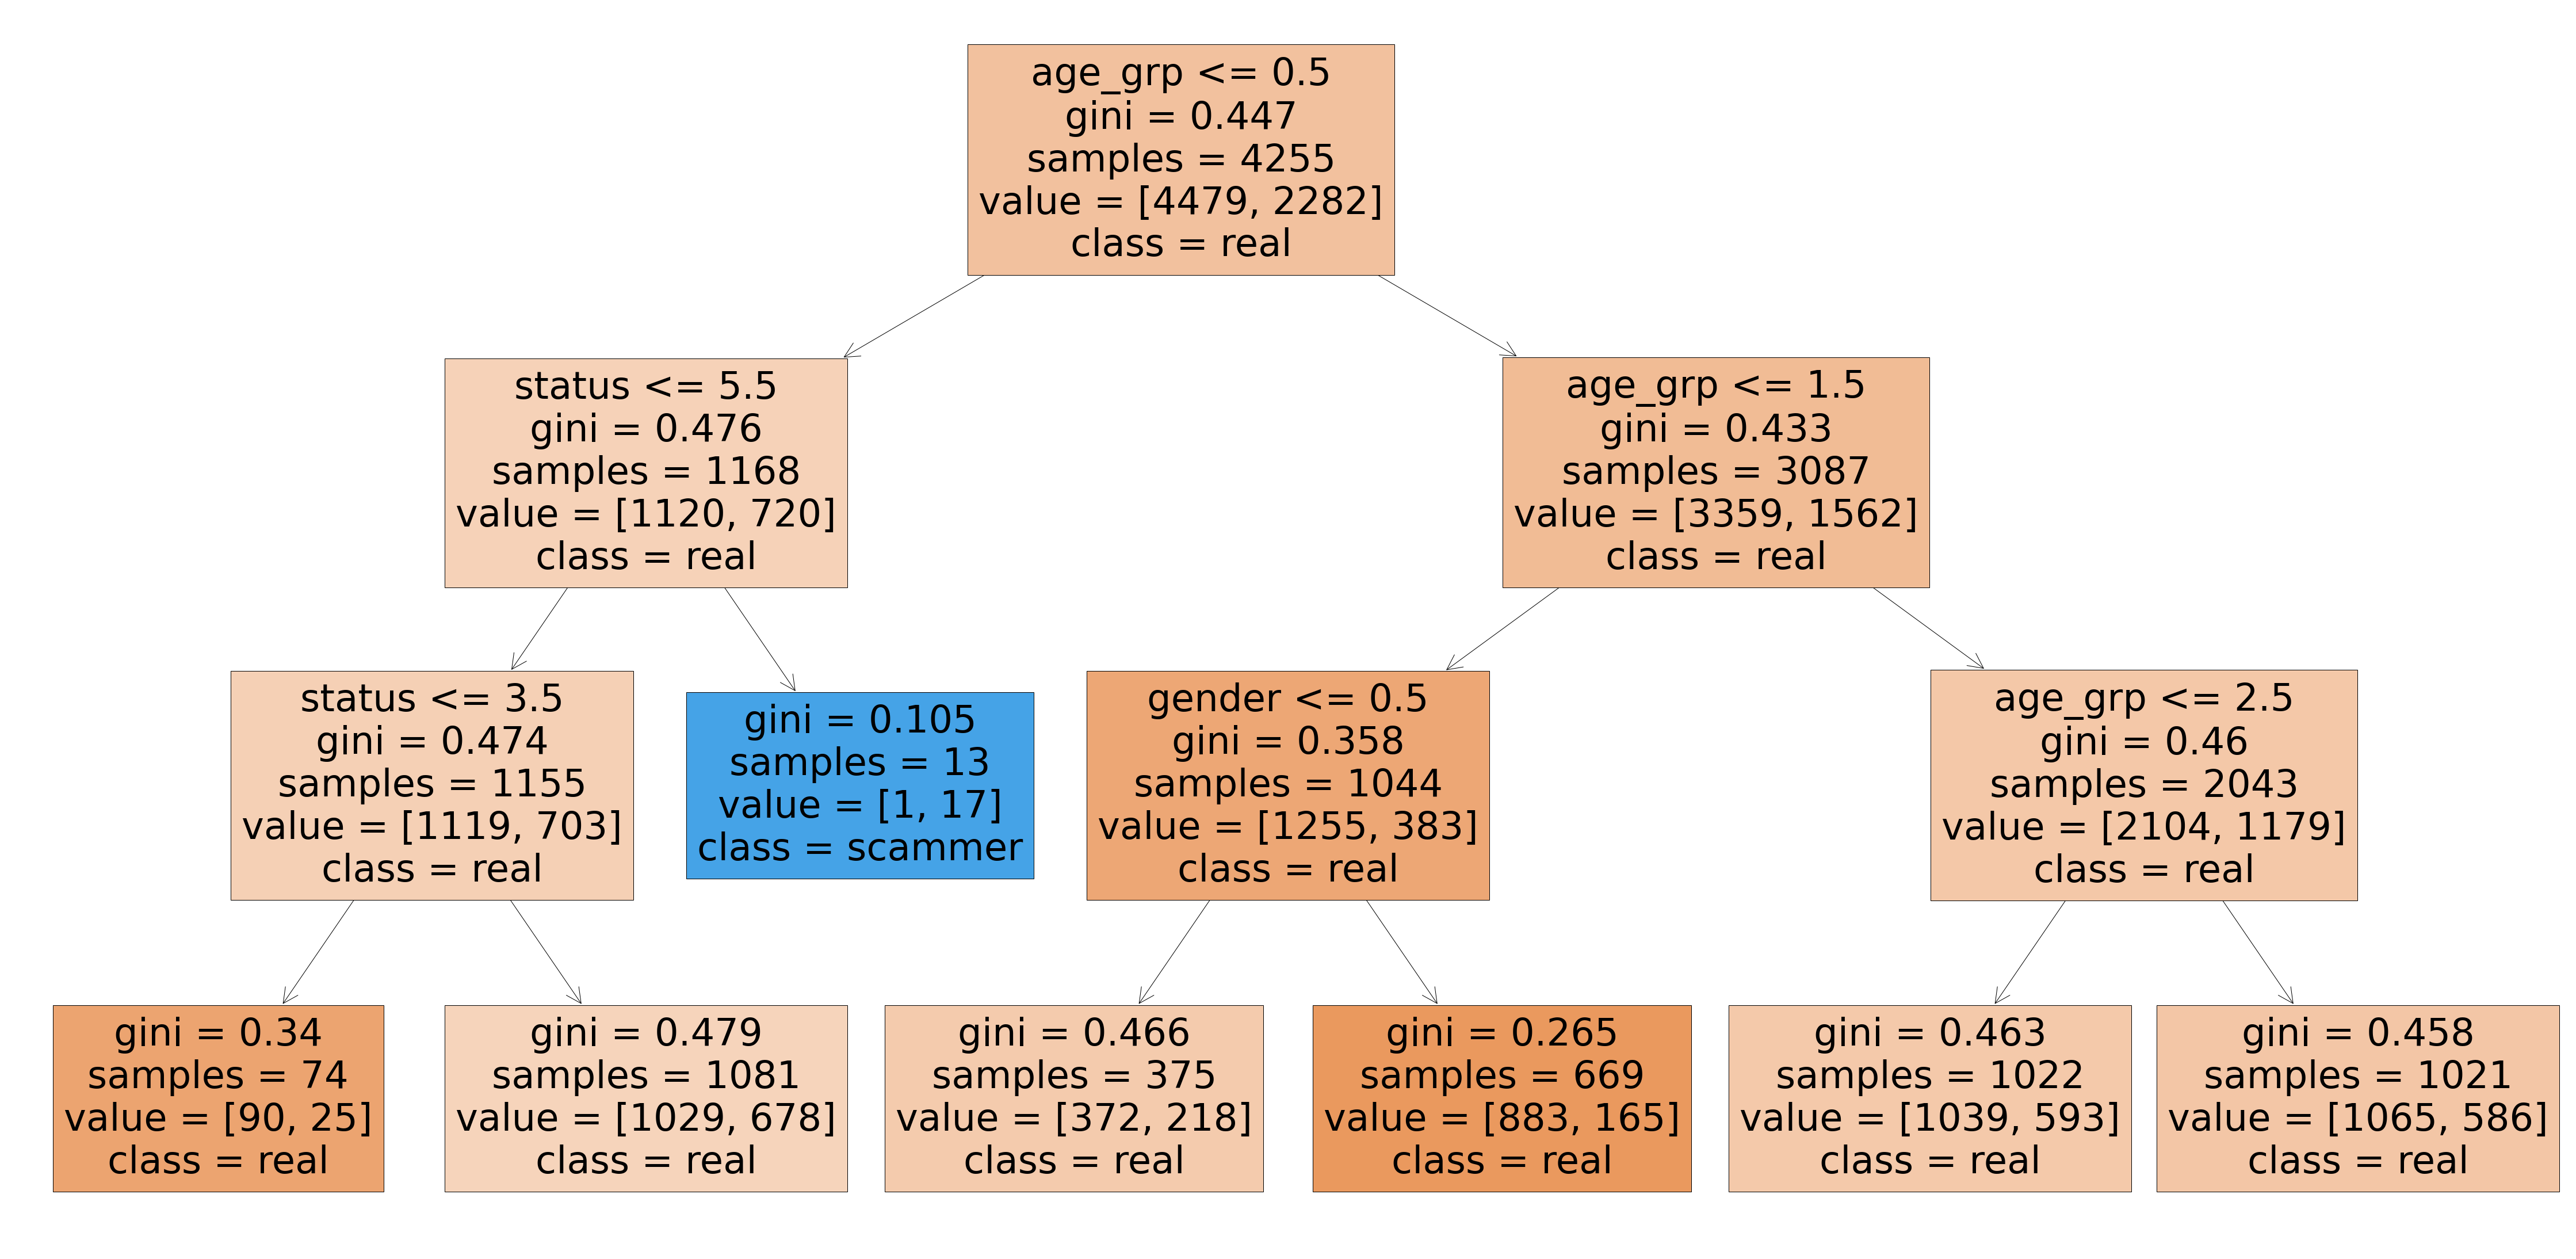

In [86]:
plt.figure(figsize=(80,40))
tree.plot_tree(rf_best.estimators_[3], feature_names = X.columns,class_names=['real', "scammer"],filled=True);


In [56]:
rf_best.feature_importances_
imp_df = pd.DataFrame({
    "Varname": X.columns,
    "Imp": rf_best.feature_importances_
})
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,status,0.556038
2,age_grp,0.253442
1,gender,0.190519


In [57]:
# Create a Random Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# prediction on test set
y_pred = clf.predict(X_test)

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
print("Precision:",precision)
print("Recall:",recall)
print("F1_score:",f1_score)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))


Precision: 0.7702702702702703
Recall: 0.6010544815465729
F1_score: 0.6752221125370188
Accuracy: 0.8054405677114134


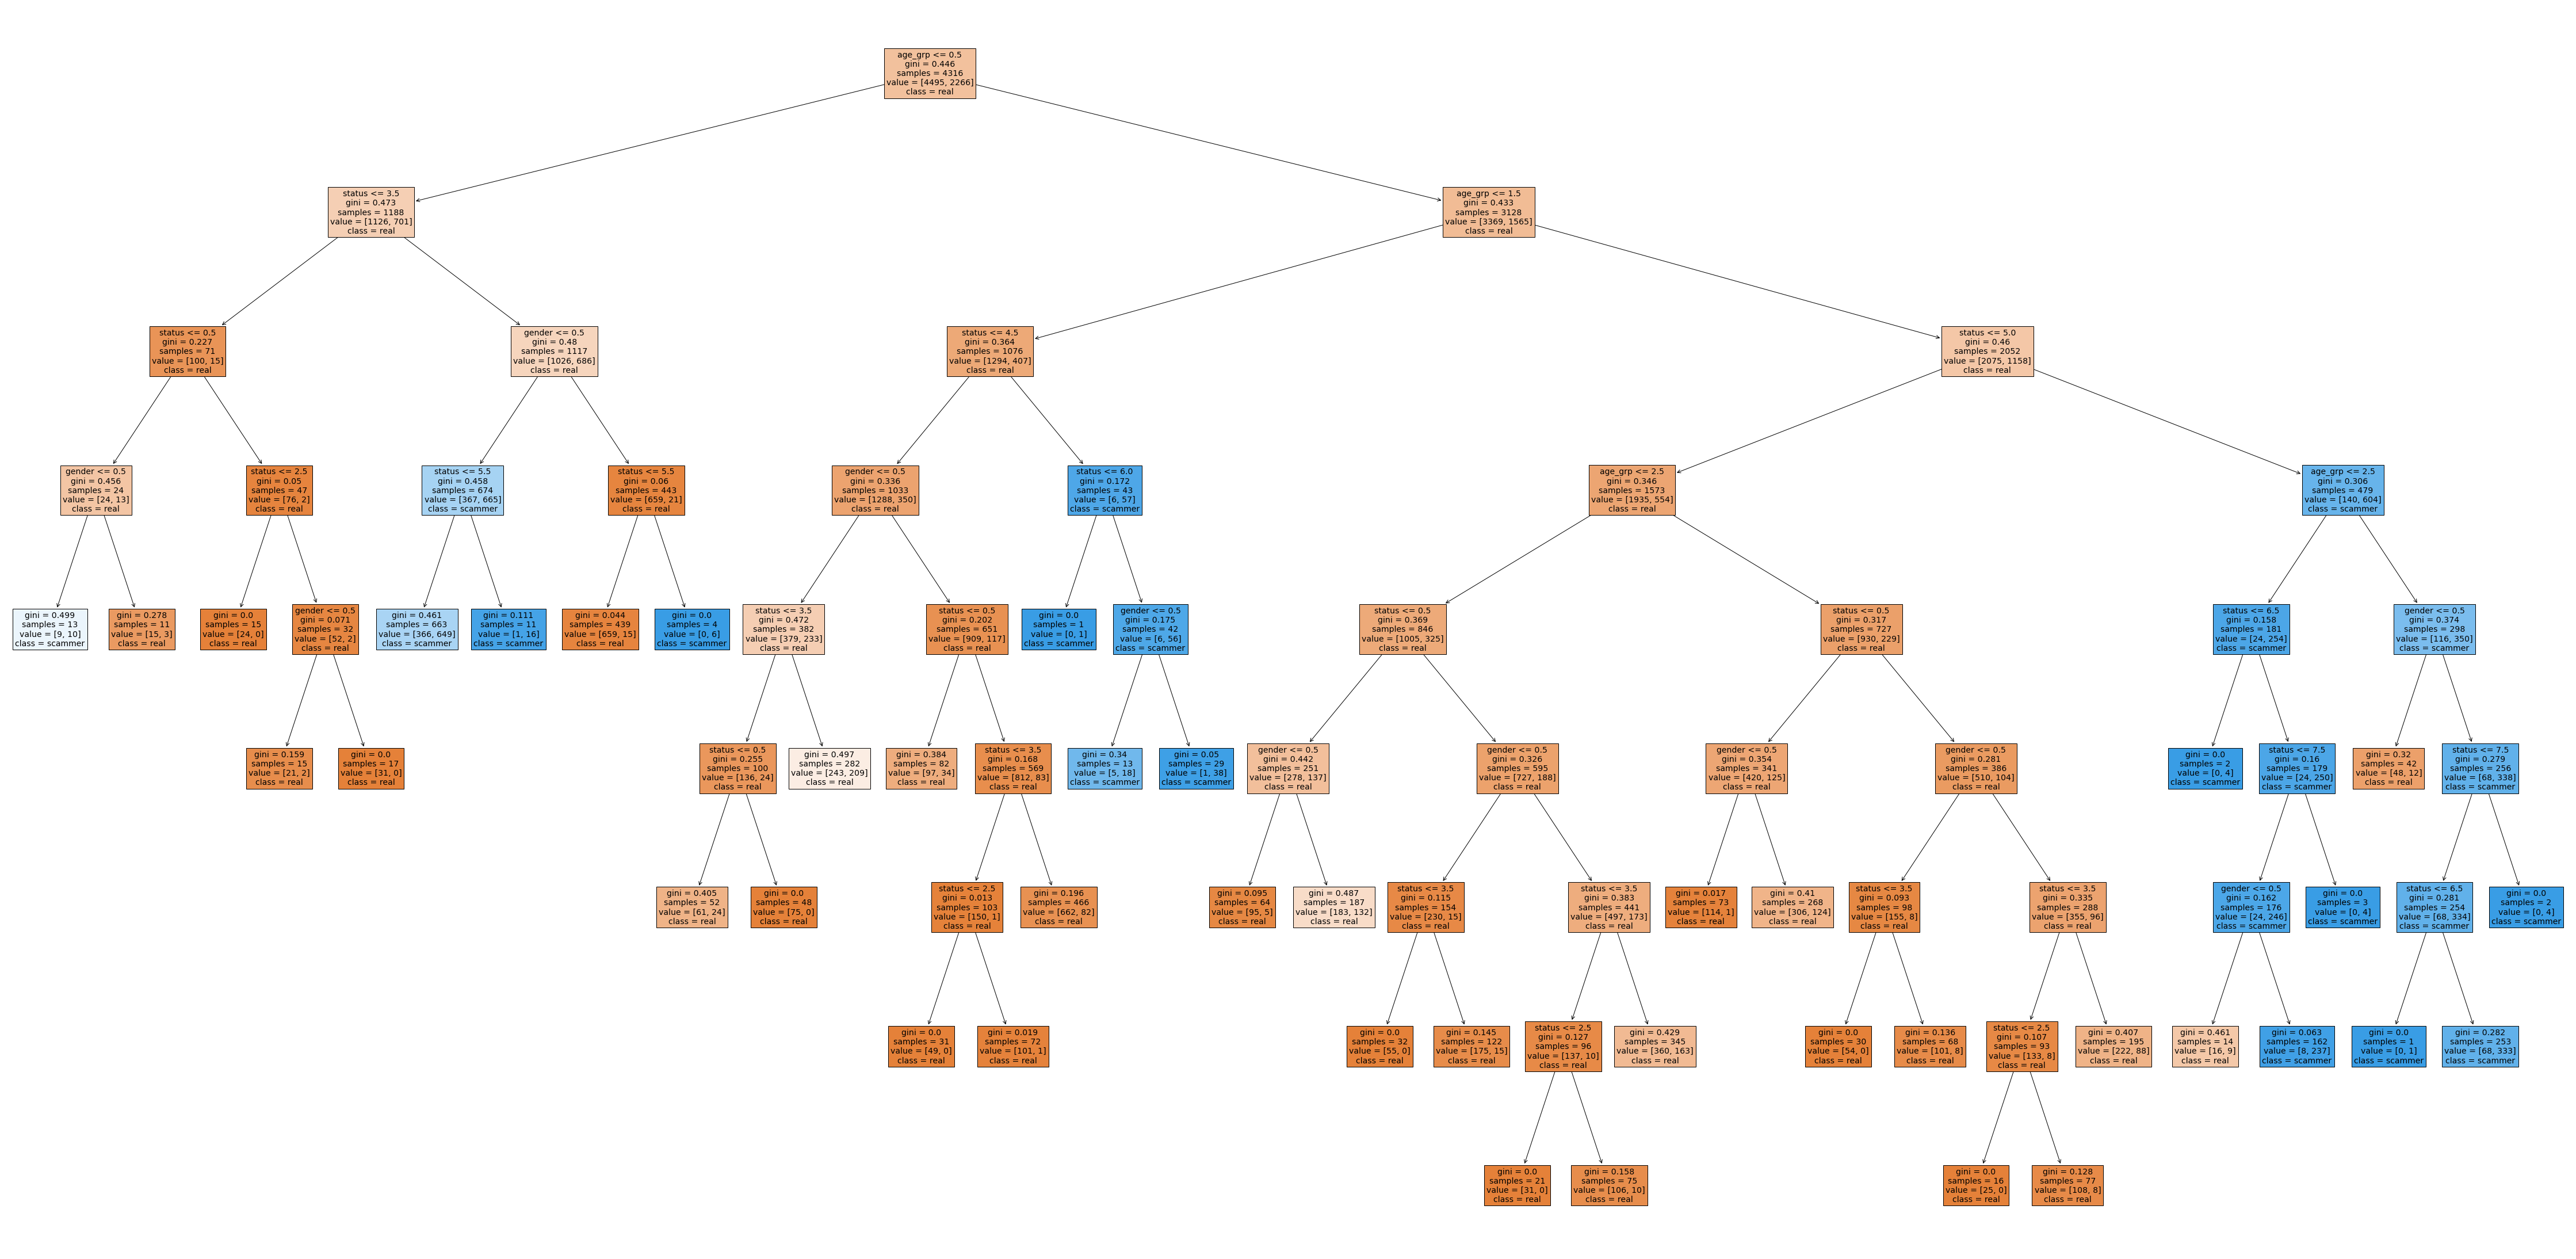

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[4],  feature_names = X.columns,class_names=['real', "scammer"],filled=True);

In [41]:
X, y = make_blobs(n_samples=10000, n_features=6, centers=100,random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())


clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())



0.969
0.9914
0.9948


In [42]:
#BAGGING
#METHOD 1
...
# generate dataset
X, y = make_classification(n_samples=10000, n_features=6, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
model = BaggingClassifier()


...
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % mean(scores))


Mean ROC AUC: 0.895


In [43]:
#METHOD 2
for column in df:
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])
        

X = df.drop("y", axis=1)

# target
y = df['y']



# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)


# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_test_dt = accuracy_score(y_test, y_pred_dt)
print('Test set accuracy of dt: {:.2f}'.format(acc_test_dt))



# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, oob_score=True, random_state=1)

bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy of bc: 1.00
Test set accuracy of dt: 1.00
Test set accuracy: 0.998, OOB accuracy: 0.999


In [44]:
# Create a Random Classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
clf.fit(X_train, y_train)

# prediction on test set
y_pred = clf.predict(X_test)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))
# get predictions and compare results
predictions = clf.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.sample(10)

Accuracy: 0.9994086339444116


,Actual,Predicted
4813,0,0
5294,0,0
728,0,0
651,0,0
6453,1,1
989,0,0
2664,0,0
5056,0,0
4660,0,0
1667,0,0


In [45]:
# Accuracy
accuracy = accuracy_score(y_test,predictions)
print("Accuracy:",accuracy)

Accuracy: 0.9994086339444116


In [46]:
# Precision and Recall
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
f_measure = metrics.f1_score(y_test, predictions)
print("Precision:",precision)
print("Recall:",recall)
print("F-measure:",f_measure)

Precision: 1.0
Recall: 0.9982425307557118
F-measure: 0.9991204925241866


Feature Enginnering 

Modelling Features 

Decision Tree

Decision Tree data split visulisation 